In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load the dataset from the specified path
csv_path = "C:\\Users\\jaisi\\Documents\\Afame Datsets\\Cus. Churn Prediction-20240902T072047Z-001\\Cus. Churn Prediction\\Churn_Modelling.csv"
df = pd.read_csv(csv_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# Display dataset info and check for missing values
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
# Display descriptive statistics of the numerical features
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


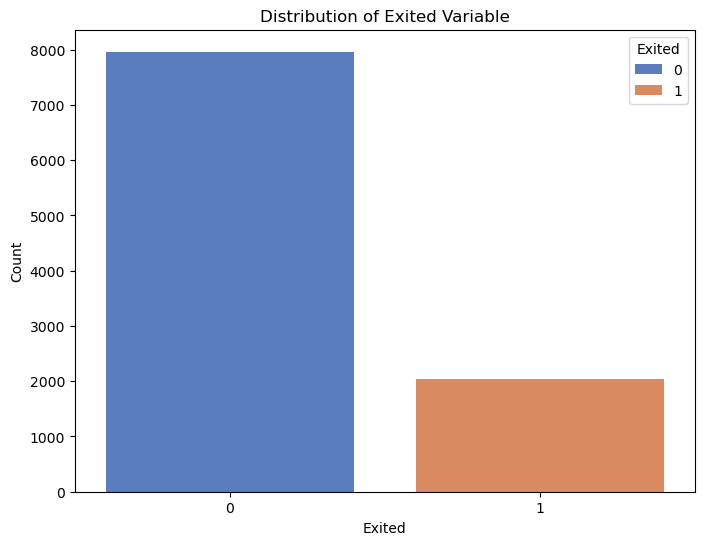

In [4]:
# Visualize the distribution of the target variable `Exited`
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Exited', palette='muted', hue='Exited')
plt.title('Distribution of Exited Variable')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

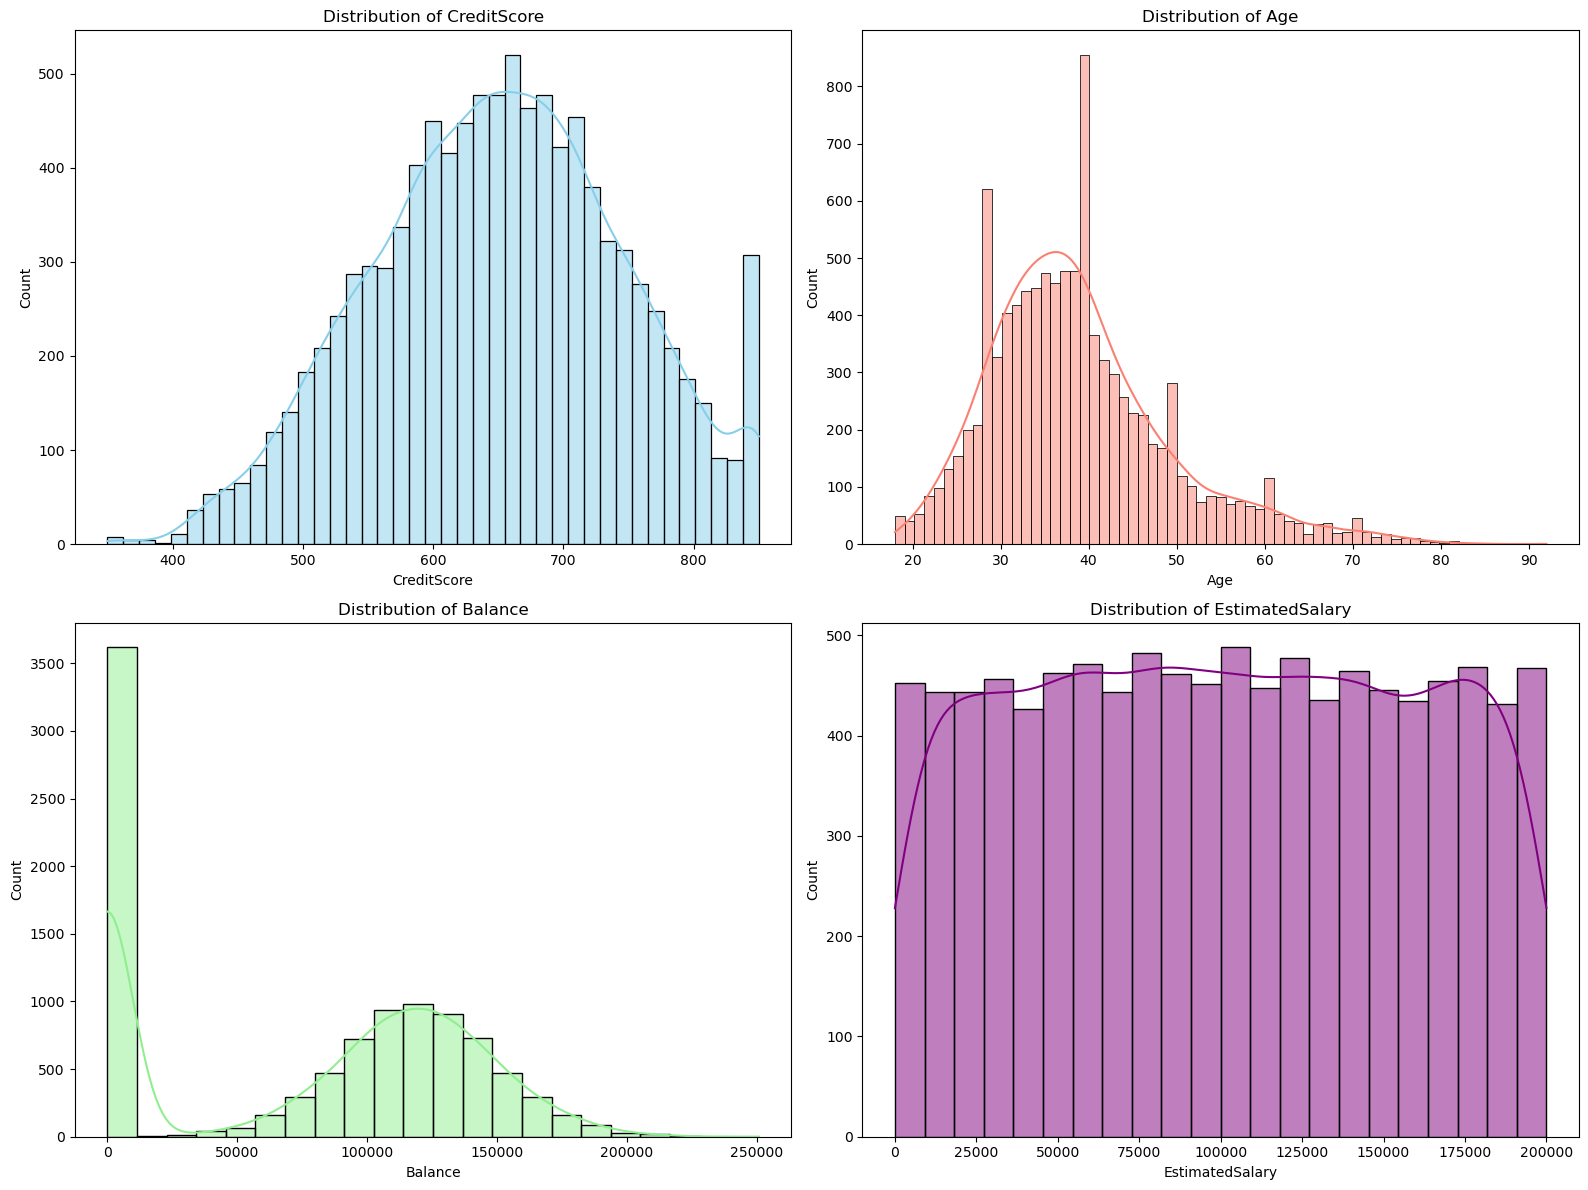

In [5]:
# Visualize the distribution of numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# CreditScore
sns.histplot(df['CreditScore'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of CreditScore')

# Age
sns.histplot(df['Age'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Age')

# Balance
sns.histplot(df['Balance'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Balance')

# EstimatedSalary
sns.histplot(df['EstimatedSalary'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Distribution of EstimatedSalary')

plt.tight_layout()
plt.show()

### Interpretation of EDA

1. **Dataset Overview**:
   - The dataset consists of 14 columns, with a mix of numerical and categorical features. It contains no missing values, ensuring a clean dataset for analysis.

2. **Distribution of Target Variable**:
   - The `Exited` variable is imbalanced, with a higher number of non-exited (0) instances compared to exited (1). This imbalance is addressed by using SMOTE in the modeling phase.

3. **Feature Distributions**:
   - **CreditScore**: The distribution is somewhat normal but ranges from low to high, indicating variability in credit scores among customers.
   - **Age**: The age distribution shows that most customers are in the 30-50 range. This spread is typical for customer datasets.
   - **Balance**: Many customers have a balance of zero, indicating a high number of customers with no balance. This might be due to recent account closures or inactive accounts.
   - **EstimatedSalary**: The distribution is right-skewed, with most customers earning below the higher end of the salary range. 

4. **Visualizations**:
   - The histograms and count plots provide insights into the distribution and range of the features, which will guide preprocessing and fature scaling.


In [6]:
# Drop unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Display the updated dataframe
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [7]:
# Define features (X) and target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

# Display shapes of datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [9]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to scaled training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [10]:
# Initialize Gradient Boosting Classifier with best hyperparameters
gb_classifier = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=7,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the classifier
gb_classifier.fit(X_train_smote, y_train_smote)

# Make predictions with the trained model
y_pred_best_gb = gb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
conf_matrix_best_gb = confusion_matrix(y_test, y_pred_best_gb)
class_report_best_gb = classification_report(y_test, y_pred_best_gb)

# Display the accuracy
accuracy_best_gb

0.8525

In [11]:
# Display classification report
print("Classification Report with Best Hyperparameters:")
print(class_report_best_gb)

Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.67      0.54      0.60       407

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.75      2000
weighted avg       0.84      0.85      0.85      2000



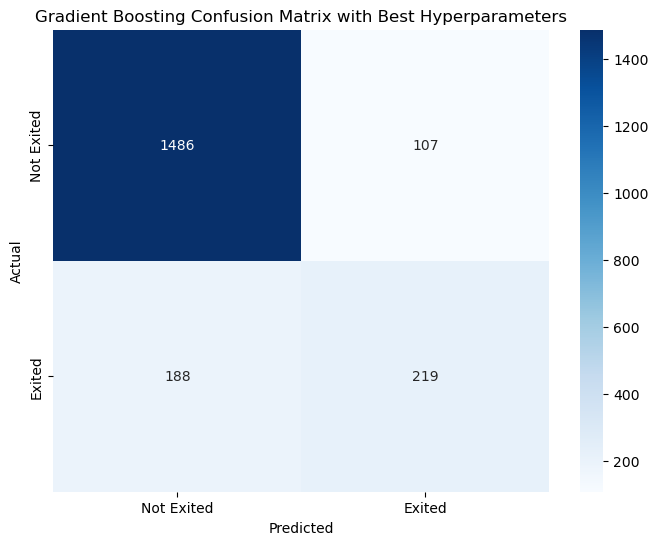

In [12]:
# Visualize the confusion matrix using the Blues colormap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_gb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Exited', 'Exited'], 
            yticklabels=['Not Exited', 'Exited'])
plt.title('Gradient Boosting Confusion Matrix with Best Hyperparameters')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Insights

1. **Model Performance**:
   - The Gradient Boosting Classifier with best hyperparameters achieved an accuracy of 85% on the test set. This indicates a good overall performance of the model.

2. **Classification Report**:
   - **Precision**: The model has a precision of 0.89 for class 0 (not exited) and 0.67 for class 1 (exited). This means that when the model predicts an instance as exited, it is correct 67% of the time.
   - **Recall**: The recall for class 0 is 0.93, indicating that the model identifies 93% of all actual non-exited instances. For class 1, the recall is 0.54, meaning it identifies 54% of all actual exited instances. This shows that the model is better at detecting non-exited customers compared to exited ones.
   - **F1-Score**: The F1-score, which balances precision and recall, is 0.60 for class 1 and 0.91 for class 0. This indicates that while the model performs well for class 0, there is room for improvement in detecting exited customers.

3. **Confusion Matrix**:
   - The confusion matrix shows that the model makes more false negatives (misclassifying exited customers as not exited) than false positives. This suggests that while the model is good at predicting non-exited customers, it struggles more with predicting exited customers.

4. **SMOTE Impact**:
   - Applying SMOTE to balance the classes improved the recall for the exited class, although the precision decreased slightly. This indicates that SMOTE helped the model become more sensitive to exited customers, but it also increased the likelihood of fase positives.
